# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt


import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
pd.DataFrame(df.value_counts())

0
Pregnancies Glucose BloodPressure SkinThickness Insulin BMI  DiabetesPedigreeFunction Age Outcome   
0           57      60            0             0       21.7 0.735                    67  0        1
            67      76            0             0       45.3 0.194                    46  0        1
5           103     108           37            0       39.2 0.305                    65  0        1
            104     74            0             0       28.8 0.153                    48  0        1
            105     72            29            325     36.9 0.159                    28  0        1
...                                                                                               ..
2           84      50            23            76      30.4 0.968                    21  0        1
            85      65            0             0       39.6 0.930                    27  0        1
            87      0             23            0       28.9 0.773                    25  0        1
                    58            16            52      32.7 0.166                    25  0        1
17          163     72            41            114     40.9 0.817                    47  1        1

[768 rows x 1 columns]

## Shape of data

In [7]:
df.shape

(768, 9)

**Observation**
- There are **768 Rows** and **9 Columns** in datasets

In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

**Observation**
- All the features are **Numericals value**

### Checking null values

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Observation**
- There is **no null value in dataset

## Checking Duplicated Value

In [16]:
df.duplicated().sum()

0

## EDA

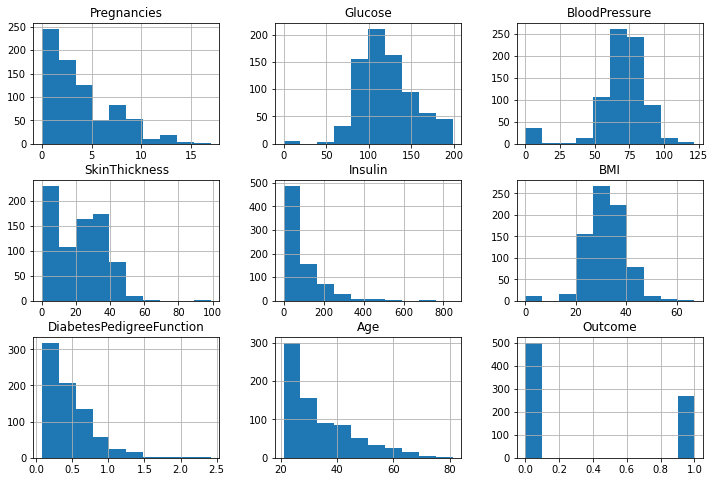

In [10]:
df.hist(figsize=(12,8))
plt.show()

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

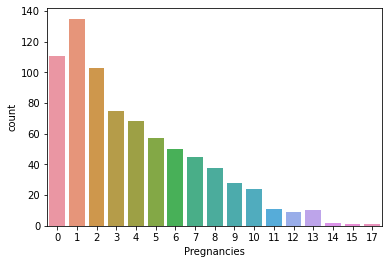

In [26]:
sns.countplot(data=df,x=df.Pregnancies)

**Observation**
- The maximum number of pregencies is **1**

<AxesSubplot:>

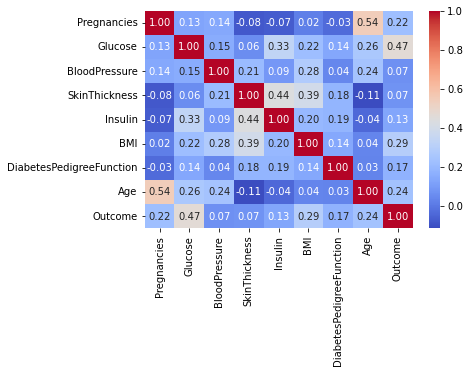

In [12]:
sns.heatmap(data=df.corr(),annot=True,fmt = ".2f", cmap = "coolwarm")

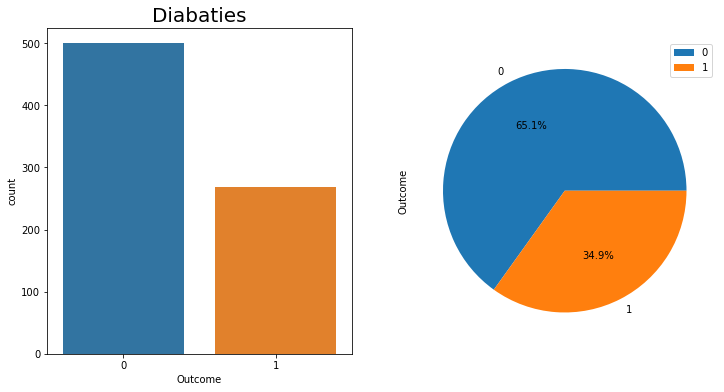

In [13]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Diabaties",fontsize=20)
sns.countplot(data=df,x=df.Outcome)
plt.subplot(1,2,2)
df.Outcome.value_counts().plot(kind='pie',autopct='%.1f%%')
plt.legend(loc=1)

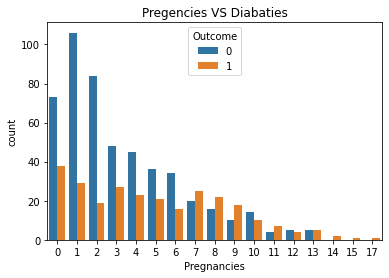

In [14]:
sns.countplot(data=df,x=df.Pregnancies,hue=df.Outcome)
plt.title("Pregencies VS Diabaties")
plt.show()

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

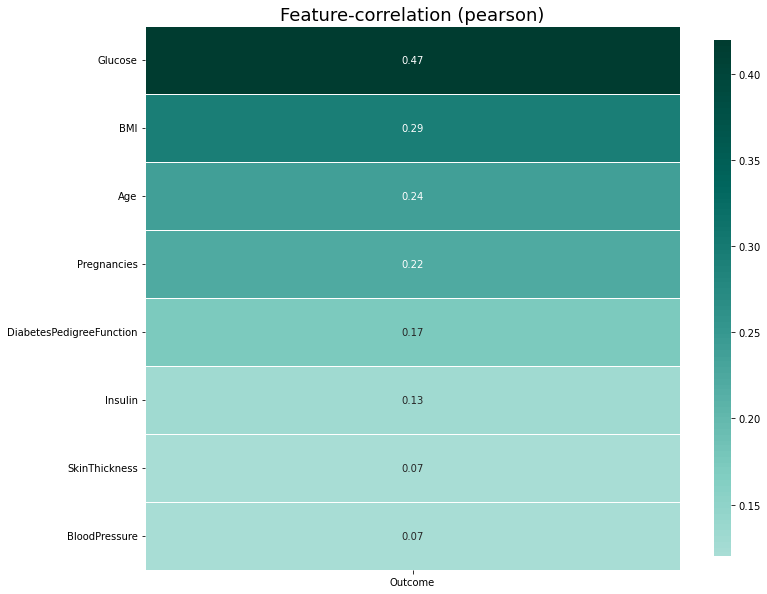

In [28]:
import klib
klib.corr_plot(df, target='Outcome')

**Observation**
- Glucose,BMI,Age,Pregencies are **highly** co-related with **Outcome**
- DiabetesPedigreeFunction,Insulin,Skinthickness,BloodPressure are **less** co-related with **Outcome**

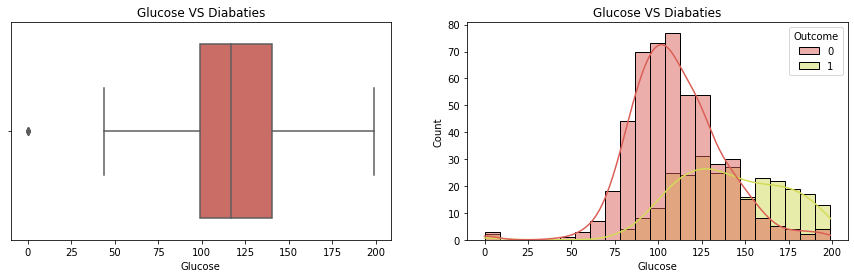

In [88]:
palette=sns.color_palette("hls")
sns.set_palette(palette)
#box plot and histogram plot of glucose column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.title("Glucose VS Diabaties")
sns.boxplot(x='Glucose', data=df)

plt.subplot(1,2,2)
plt.title("Glucose VS Diabaties")
sns.histplot(data=df, hue='Outcome', x="Glucose",kde=True)

plt.show()


**Observation**
- 1 Outliers detects
- Maximum value of **Glucose** is **200**
- Q3 is **140.25**

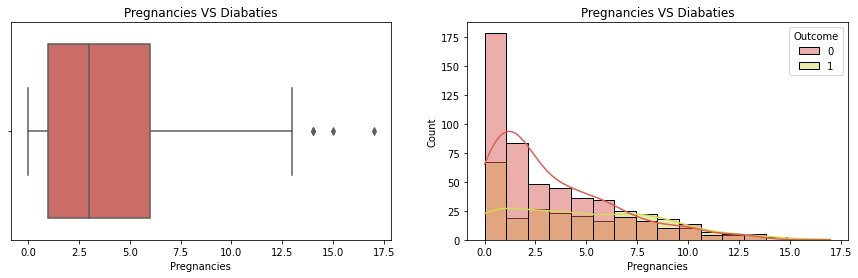

In [89]:
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='Pregnancies', data=df)
plt.title("Pregnancies VS Diabaties")
plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="Pregnancies",kde=True)
plt.title("Pregnancies VS Diabaties")
plt.show()

**Observation**
-  Minimum value of **Pregnanices** is 0
- Q1 is 1.0
- Maximum value of **Pregnanices** is 17
- 3 outliers detects after 12 no of Pregnanices

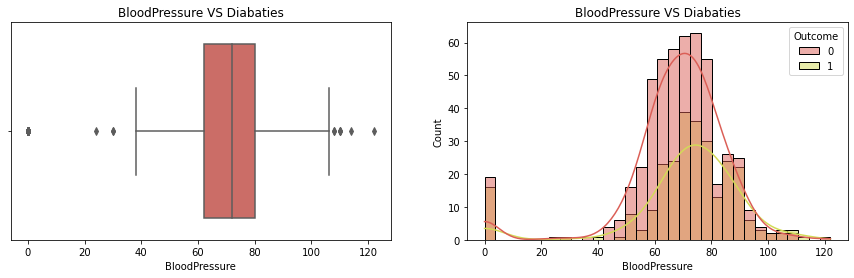

In [90]:
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='BloodPressure', data=df)
plt.title("BloodPressure VS Diabaties")

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="BloodPressure",kde=True)
plt.title("BloodPressure VS Diabaties")

plt.show()

**Observation**
- 3 Outliers detects where **BloodPressure** is less than **40**

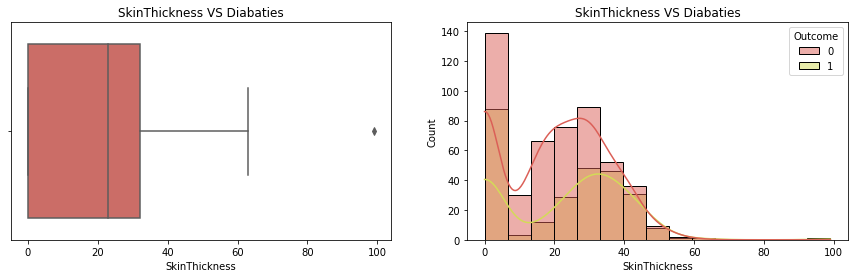

In [91]:
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='SkinThickness', data=df)
plt.title("SkinThickness VS Diabaties")

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="SkinThickness",kde=True)
plt.title("SkinThickness VS Diabaties")

plt.show()

**Observation**
- 1 outliers detects where **SkinThickness** is **100**

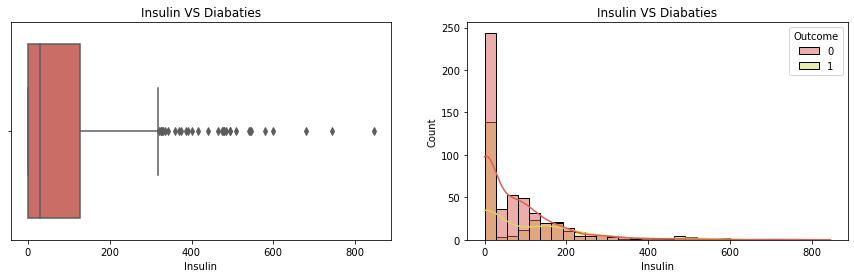

In [92]:
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='Insulin', data=df)
plt.title("Insulin VS Diabaties")

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="Insulin",kde=True)
plt.title("Insulin VS Diabaties")

plt.show()

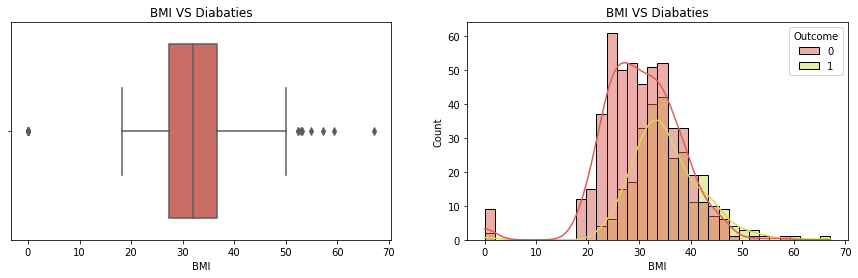

In [93]:
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='BMI', data=df)
plt.title("BMI VS Diabaties")

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="BMI",kde=True)
plt.title("BMI VS Diabaties")

plt.show()

**Observation**
- 1 outliers detects where **BMI** is **Zero**
- 6 outliers detects where **BMI** is more than **50**

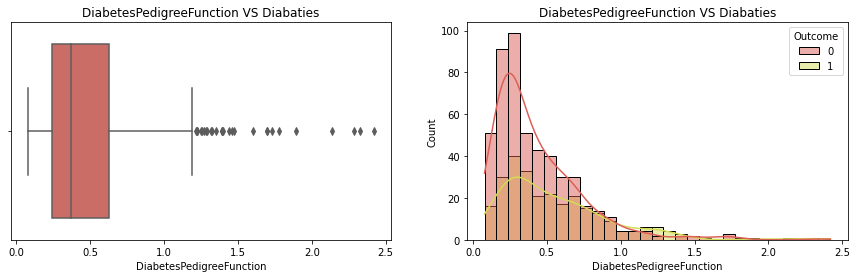

In [94]:
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='DiabetesPedigreeFunction', data=df)
plt.title("DiabetesPedigreeFunction VS Diabaties")

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="DiabetesPedigreeFunction",kde=True)
plt.title("DiabetesPedigreeFunction VS Diabaties")

plt.show()

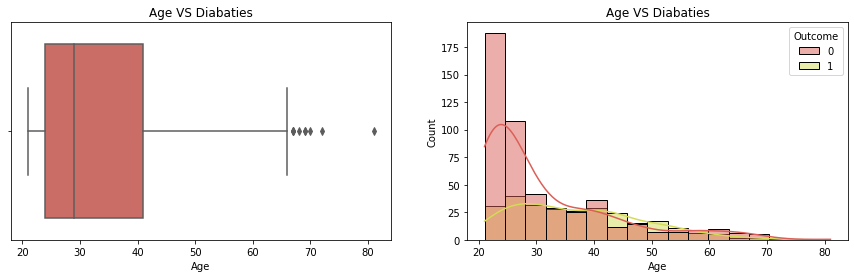

In [95]:
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='Age', data=df)
plt.title("Age VS Diabaties")

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="Age",kde=True)
plt.title("Age VS Diabaties")

plt.show()

**Observation**
- Minimum Age in dataset is **21**
- Outliers detected after **65 age**